# Comparison of classical forecasting methods

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_csv('electricity.csv', index_col='Month', parse_dates=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df = df.iloc[::-1]
df 

C:\Users\Marcin\AppData\Local\Temp\ipykernel_396\1188158003.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('electricity.csv', index_col='Month', parse_dates=True)


,Coal thousand tons
Month,
2007-12-01,96610.08500
2008-01-01,88657.02500
2008-02-01,85270.25400
2008-03-01,78700.16800
2008-04-01,83057.81600
...,...
2022-06-01,50386.76376
2022-07-01,49318.31997
2022-08-01,38207.03492


Timeseries plot

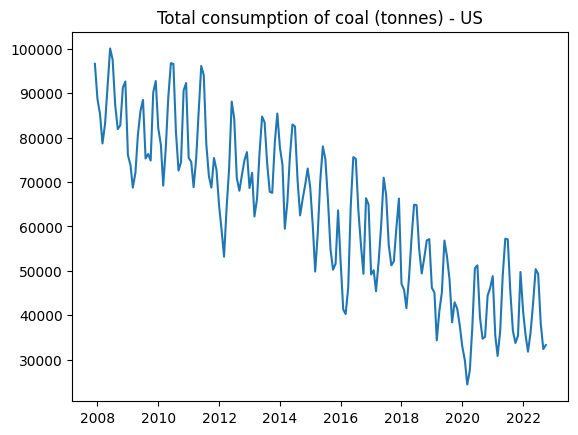

In [27]:
plt.title('Total consumption of coal (tonnes) - US')
plt.plot(df)

Train and test data split

In [28]:
train_data = df.iloc[:int(len(df)*0.8)]
test_data = df.iloc[int(len(df)*0.8):]

# Holt-Winters method

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitHoltWinter = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()
fcastHoltWinter = fitHoltWinter.forecast(len(test_data)).rename('Holt-Winters Predict')
fcastHoltWinter

C:\Users\Marcin\Desktop\studia\Time-Series-Analysis\Lab7v2\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Marcin\Desktop\studia\Time-Series-Analysis\Lab7v2\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2019-11-01    51459.287204
2019-12-01    55166.653654
2020-01-01    42863.437794
2020-02-01    39414.040075
2020-03-01    31946.439319
2020-04-01    38770.742579
2020-05-01    48756.787872
2020-06-01    58130.809606
2020-07-01    56361.649773
2020-08-01    45022.820076
2020-09-01    37905.026093
2020-10-01    38185.756293
2020-11-01    47745.842465
2020-12-01    51453.208916
2021-01-01    39149.993055
2021-02-01    35700.595336
2021-03-01    28232.994581
2021-04-01    35057.297841
2021-05-01    45043.343133
2021-06-01    54417.364867
2021-07-01    52648.205034
2021-08-01    41309.375337
2021-09-01    34191.581355
2021-10-01    34472.311554
2021-11-01    44032.397727
2021-12-01    47739.764177
2022-01-01    35436.548316
2022-02-01    31987.150598
2022-03-01    24519.549842
2022-04-01    31343.853102
2022-05-01    41329.898395
2022-06-01    50703.920129
2022-07-01    48934.760296
2022-08-01    37595.930598
2022-09-01    30478.136616
2022-10-01    30758.866816
Freq: MS, Name: Holt-Winters

Plot of the timeseries with forecast

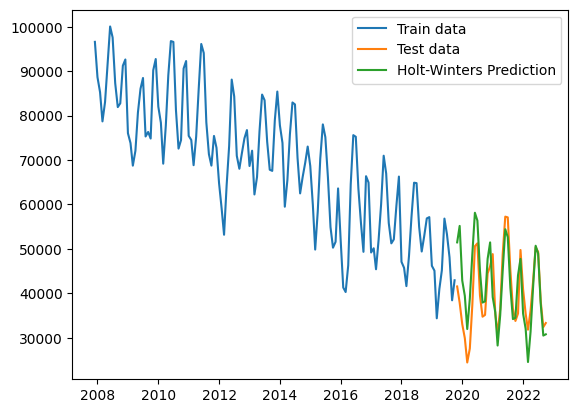

In [30]:
plt.plot(train_data, label='Train data')
plt.plot(test_data, label='Test data')
plt.plot(fcastHoltWinter, label='Holt-Winters Prediction')
plt.legend()

# SARIMA method

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

auto_arima(df, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3711.553, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3648.425, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3669.088, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3709.902, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3709.678, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3639.620, Time=0.27 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3626.304, Time=0.29 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3624.305, Time=0.12 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3666.668, Time=0.08 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3626.272, Time=0.31 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3653.985, Time=0.16 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  179
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1783.642
Date:                              Sun, 05 May 2024   AIC                           3581.283
Time:                                      16:55:36   BIC                           3603.556
Sample:                                  12-01-2007   HQIC                          3590.316
                                       - 10-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0385      0.053     -0.722      0.471      -0.143       0.066
ar.L2         -0.0997      0.065     -1.541      0.123      -0.227       0.027
ar.L3         -0.1728      0.041     -4.216      0.000      -0.253      -0.092
ar.L4         -0.0888      0.034     -2.583      0.010      -0.156      -0.021
ar.S.L12       0.9674      0.027     35.617      0.000       0.914       1.021
ma.S.L12      -0.8791      0.056    -15.804      0.000      -0.988      -0.770
sigma2      3.321e+07    1.4e-10   2.37e+17      0.000    3.32e+07    3.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.48   Prob(JB):                         0.51
Heteroskedasticity (H):               0.39   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.43e+33. Standard errors may be unstable.
"""

Split to train / test

In [33]:
train = df.iloc[:-int(len(df) * 0.8)]
test = df.iloc[-int(len(df) * 0.8):]

In [43]:
model = SARIMAX(train, order=(4,1,0), seasonal_order=(1, 0, 1, 12))
result = model.fit()

C:\Users\Marcin\Desktop\studia\Time-Series-Analysis\Lab7v2\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Marcin\Desktop\studia\Time-Series-Analysis\Lab7v2\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Marcin\Desktop\studia\Time-Series-Analysis\Lab7v2\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [48]:
fcastSARIMAX = result.forecast(len(test))
fcastSARIMAX = fcastSARIMAX.rename('SARIMAX Predict')
fcastSARIMAX

2010-12-01    100564.856655
2011-01-01     96295.414550
2011-02-01     92790.652415
2011-03-01     89978.106563
2011-04-01     91757.591815
                  ...      
2022-06-01    161306.218643
2022-07-01    161483.033978
2022-08-01    157641.484603
2022-09-01    155180.538687
2022-10-01    154839.124399
Freq: MS, Name: SARIMAX Predict, Length: 143, dtype: float64

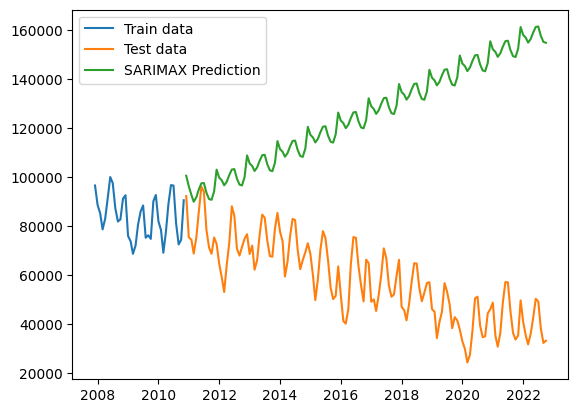

In [49]:
plt.plot(train, label='Train data')
plt.plot(test, label='Test data')
plt.plot(fcastSARIMAX, label='SARIMAX Prediction')
plt.legend()

# Conclusions
 - As we can see the Holt-Winters prediction was much more accurate, this might be the result of some mistake or error while performing the SARIMAX method analysis
 - The issued might be found in incosistency of the data, missing values or other issue